# Teacher Summary
This colab will allow you to summarize the entire class's data.

## Upload the CSV of your classes responses.

In [ ]:
import io
import pandas as pd
from google.colab import files
from sklearn.cluster import KMeans
import json

def is_json(json_string):
  """Test if a string is valid JSON."""
  try:
    json.loads(json_string)
  except ValueError as e:
    return False
  return True

def load_student_data(student_string):
  """Tries to parse student string or fix common issues.""" 
  try:
    if is_json(student_string):
      return pd.read_json(student_string)
    elif is_json("{" + student_string):
      return pd.read_json("{" + student_string)
    elif is_json(student_string + "}"):
      return pd.read_json(student_string + "}")
    else:
      return None
  except:
    return None
    
uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]
student_responses = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

Saving Class RGB Collection Form.2 (Responses) - Form Responses 1.csv to Class RGB Collection Form.2 (Responses) - Form Responses 1.csv


# Data Validation

In [ ]:
expected_columns = ['Data type', 'Paste your point data']
was_error = False
for column in expected_columns:
  if column not in student_responses.columns:
    print(f"You are missing column '{column}' make sure that the CSV contains this.")
    was_error = True
if not was_error:
  initial_length = student_responses.shape[0]
  student_responses = student_responses.dropna()
  after_length = student_responses.shape[0]
  print("Your data looks good!")
  if initial_length != after_length:
    print(f"There were {initial_length - after_length} incomplete rows that were dropped.")

Your data looks good!
There were 1 incomplete rows that were dropped.


In [ ]:
student_responses

,Source,Data type,Paste your point data
0,Vogue,Male,"{""blue""{""0"":156.0,""1"":197.0,""2"":124.0,""3"":85.0..."
1,Vogue,Female,"{""red"":{""0"":147.0,""1"":162.0,""2"":118.0,""3"":153...."
2,Vanity Fair,Male,"{""red"":{""0"":91.0,""1"":94.0,""2"":82.0,""3"":103.0,""..."
3,Vanity Fair,Female,"{""red"":{""0"":214.0,""1"":217.0,""2"":223.0},""green""..."
4,Total Film,Male,"{""red"":{""0"":102.0,""1"":89.0,""2"":87.0,""3"":159.0,..."
5,Total Film,Female,"{""red"":{""0"":119.0,""1"":126.0,""2"":133.0,""3"":36.0..."
6,Triathlete,Male,"{""red"":{""0"":197.0,""1"":200.0,""2"":192.0},""green""..."
7,Triathlete,Female,0
8,Reader,Male,"{""red"":{""0"":253.0,""1"":234.0,""2"":243.0,""3"":236...."
9,Reader,Female,"{""red"":{""0"":206.0,""1"":224.0,""2"":255.0,""3"":255...."


# Summarize by data type

In [ ]:
# Import scikit-learn, a machine learning library.
from sklearn.cluster import KMeans
import plotly.graph_objects as go

def create_visualization(points, dataset_name):
  # Fit clusters.
  num_clusters = 5 # You can change this if you want more/less than 5 bins!
  kmeans_cluster = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans_cluster.fit(points[['red','green','blue']])

  # Turn cluster centers into a color and sort by hue.
  cluster_center_colors = []

  def luminance_of_color(r,g,b):
    """ Luminance is a perceived brightness of an RGB color. """
    return 0.2126*r + 0.7152*g + 0.0722*b
  cluster_center_order = []
  cluster_center_order_map = {}

  # Loop through each colors
  for current_index, color in enumerate(kmeans_cluster.cluster_centers_):
    r, g, b = color
    color_tuple = (int(r)/255,int(g)/255,int(b)/255)
    # Add the color to the bin.
    cluster_center_colors.append((
        luminance_of_color(r,g,b),
        current_index,
        (int(r)/255,int(g)/255,int(b)/255)
    ))
    cluster_center_order.append((r**2 + g**2 + b**2, len(cluster_center_order)))
  # Create mapping from original index order to new sorted cluster.
  cluster_colors = []
  for new_index, ordering in enumerate(sorted(cluster_center_colors, reverse=True)):
    _, old_index, color, = ordering
    cluster_colors.append(color)
    cluster_center_order_map[old_index] = new_index

  # Count number of points in each cluster.
  tones_by_clusters = kmeans_cluster.predict(points[['red','green','blue']])
  cluster_counts = [0] * num_clusters
  for x in tones_by_clusters:
    cluster_counts[cluster_center_order_map[x]] += 1

  # Visualize.
  import matplotlib.pyplot as plt 
  plt.bar(list(range(1, num_clusters + 1)), cluster_counts, color=cluster_colors)
  plt.title(dataset_name)
  plt.show()
  fig = create_3d_scatter(points, dataset_name)
  fig.show()

def create_3d_scatter(selected_points, plot_name):
  fig = go.Figure()
  selected_points['color'] = (
      selected_points.apply(
          lambda r: f'rgb({r["red"]}, {r["green"]}, {r["blue"]})', axis=1))
  selected_points = selected_points.dropna()

  # Create 3D scatter plot.
  fig.add_trace(dict(type='scatter3d',
                x=selected_points['red'],
                y=selected_points['green'],
                z=selected_points['blue'],
                mode='markers',
                marker=dict(color=list(selected_points['color']),
                            size=10)))

  # Set axis labels and dimensions.
  fig.update_layout(scene = dict(
                    xaxis_title='RED',
                    yaxis_title='GREEN',
                    zaxis_title='BLUE',
                    xaxis = dict(nticks=4, range=[0,255],),
                    yaxis = dict(nticks=4, range=[0,255],),
                    zaxis = dict(nticks=4, range=[0,255],))) 
  return fig    

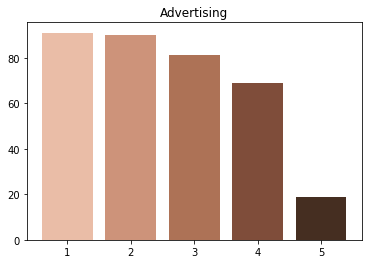

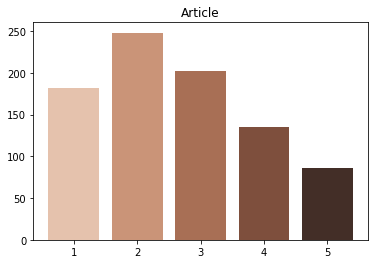

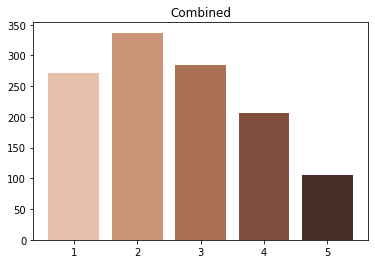

In [ ]:
number_of_invalid_rows = 0
data_groups = student_responses['Data type'].unique()
combined = pd.DataFrame()
for data_group in data_groups:
  # Combine all student points into a single dataframe. 
  selected_points = pd.DataFrame()
  student_groups_for_subset = student_responses[
    student_responses['Data type'] == data_group] 
  for _, row in student_groups_for_subset.iterrows():
    groups_data = load_student_data(row['Paste your point data'])
    if groups_data is not None:
      selected_points = selected_points.append(groups_data)
      combined = combined.append(groups_data)
    else:
      number_of_invalid_rows += 1
      print("Skipping invalid student data.")
  create_visualization(selected_points, data_group)
fig = create_visualization(combined, "Combined")
if number_of_invalid_rows:
  print(f"{number_of_invalid_rows} students had invalid data.")